In [38]:
import pandas as pd
import numpy as np

In [39]:
#some error still shows the last row number as 498, but if you look at the dimensionality the rows with any
#nan values have actually been dropped as it was originally 498x10 and it is now 397x10
original_data = pd.read_excel("Cell-Cycle-Set.xlsx")
cleaned_data = original_data.dropna()
cleaned_data

#each of the columns detail the concentration of RNA/protein during one of the 3 phases

#G1 phase is first growth phase/post mitotic gap phase
#S phase is DNA replication phase
#G2 phase is growth phase

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...
...,...,...,...,...,...,...,...,...,...,...
494,ALDH1B1,11.115773,11.158333,11.434383,26.024680,23.865020,26.095450,alcohol metabolic process;biological regulatio...,aldehyde dehydrogenase (NAD) activity;aldehyde...,cell part;cytoplasmic part;cytosol;intracellul...
495,MRPL12,11.251870,11.351043,11.255327,26.739813,24.989527,27.104197,alcohol biosynthetic process;alcohol metabolic...,binding;nucleic acid binding;protein binding;R...,cell part;cytoplasmic part;integral to membran...
496,NQO1,13.013263,13.179313,13.048477,28.422773,25.464497,28.879273,biological regulation;biosynthetic process;cel...,binding;catalytic activity;coenzyme binding;co...,cell part;cytoplasmic part;cytosol;intracellul...
497,IFIT3,9.048456,8.599903,9.105025,23.592930,19.960053,23.599087,biological regulation;cell surface receptor li...,binding;protein binding,cell part;cytoplasmic part;cytosol;intracellul...


In [40]:
#pairwise correlation

print(cleaned_data.mean_RNA_G1.corr(original_data.mean_protein_G1))
print(cleaned_data.mean_RNA_S.corr(original_data.mean_protein_S))
print(cleaned_data.mean_RNA_G2.corr(original_data.mean_protein_G2))

0.522657733063862
0.5361902686743043
0.5325650185250103


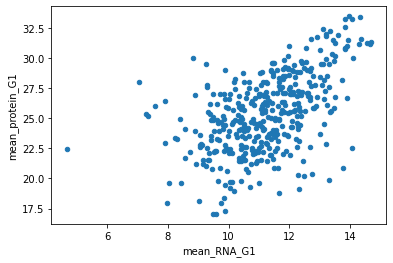

In [41]:
#scatter plot of the G1 phase
cleaned_data.plot.scatter(x = "mean_RNA_G1", y = "mean_protein_G1")

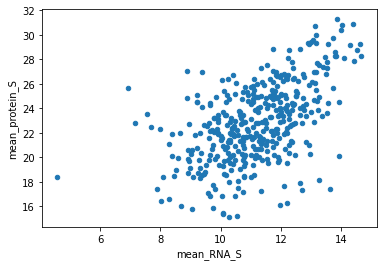

In [42]:
#scatter plot of the S phase
cleaned_data.plot.scatter(x = "mean_RNA_S", y = "mean_protein_S")

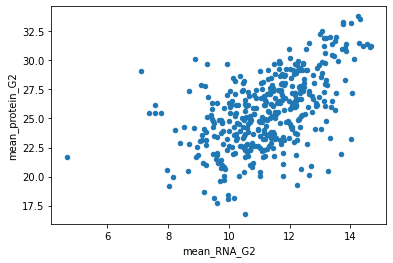

In [43]:
#scatter plot of the G2 phase
cleaned_data.plot.scatter(x = "mean_RNA_G2", y = "mean_protein_G2")

In [45]:
from sklearn.linear_model import LinearRegression

In [66]:
cleaned_data.mean_RNA_G1

1      10.330107
2      12.321340
3      10.827333
5      10.845517
6       9.042438
         ...    
494    11.115773
495    11.251870
496    13.013263
497     9.048456
498    13.525467
Name: mean_RNA_G1, Length: 397, dtype: float64

In [63]:
#Convert the pandas series into a numpy array ready to feed to a linear regression model
#Visually we can see that the data held in each column is simply a 1D array, so flatten
#it into a 1D array suitable for feeding to a linear regression model
def prepare_column(col):
    return col.to_numpy().flatten()

In [65]:
G1_rna = prepare_column(cleaned_data.mean_RNA_G1)
G1_protein = prepare_column(cleaned_data.mean_protein_G1)
X

#g1Model = LinearRegression().fit(cleaned_data.mean_RNA_G1, cleaned_data.mean_protein_G1)

array([10.33010667, 12.32134   , 10.82733333, 10.84551667,  9.042438  ,
        8.022649  ,  9.598898  , 11.41763333, 11.87049   , 10.98802667,
       11.29092333,  9.48180667, 11.52916   ,  9.368756  , 10.04086433,
       13.51566667, 10.34568667, 11.96150333, 10.90195667,  9.61708033,
        9.27109033, 11.83923333, 11.20266333, 10.10601   , 11.758     ,
        9.31234967,  9.997203  , 12.29866   , 14.34967333, 11.66922333,
       12.16822667, 10.41098   , 13.91873667,  9.65475   , 10.44331667,
       11.04026667, 11.57121667, 12.68192333, 10.04329333, 10.96884667,
        9.56179867, 10.68692333,  9.888493  ,  8.55823733, 13.02888   ,
       12.36809   , 12.64094   , 11.44465333,  8.378497  , 11.95701667,
       10.21812667, 13.59326333, 10.38870333, 12.29556333, 11.08428667,
       11.06364667,  9.26829567, 10.51854333,  9.481361  ,  8.71663133,
       11.20789   , 11.81088667, 10.95045333, 11.17639333, 13.49508333,
       13.12107   ,  9.37951467, 12.86963   ,  7.04485   , 12.30

In [62]:
y.flatten()

array([24.74802   , 19.08359333, 24.61446667, 26.11269   , 22.75052   ,
       19.64088333, 22.24373667, 26.28999333, 29.27927333, 19.6453    ,
       25.13734   , 27.04381   , 24.88391667, 25.33794667, 19.70628   ,
       30.17657333, 21.41314333, 23.54317333, 24.16969667, 24.88024667,
       22.49449   , 23.71600333, 27.01078   , 22.08764333, 25.65714667,
       21.53688333, 22.10476   , 20.26933667, 33.42070667, 28.35642   ,
       25.63216333, 19.78083667, 26.68677   , 19.78099667, 23.53949   ,
       27.01718333, 24.03496   , 26.48223333, 22.46567333, 24.51906667,
       22.24755   , 23.54819   , 17.26077   , 24.09655333, 23.65709667,
       27.16206333, 27.98441   , 25.6897    , 24.96333667, 29.11943   ,
       24.81470667, 31.95207667, 24.68035   , 27.22472667, 25.45573667,
       22.65721667, 21.03167   , 25.72209667, 25.13467   , 22.18743333,
       25.69215333, 25.53286667, 21.42321667, 24.13689333, 31.26943333,
       29.48937333, 26.16268667, 26.05469   , 27.97455   , 23.11